In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import tensorflow as tf
from neo_tracklet_classifier import directory, plots
from matplotlib import rcParams
from matplotlib import pyplot as plt

pd.set_option('display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)
# np.set_printoptions(suppress=True) #dont use scientific notation
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


print('Tensorflow version ', tf.__version__)
print('Num GPUs Available: ', len(tf.config.list_physical_devices('GPU')))


Tensorflow version  2.10.0
Num GPUs Available:  1


### Show the history and results for the raw dataset

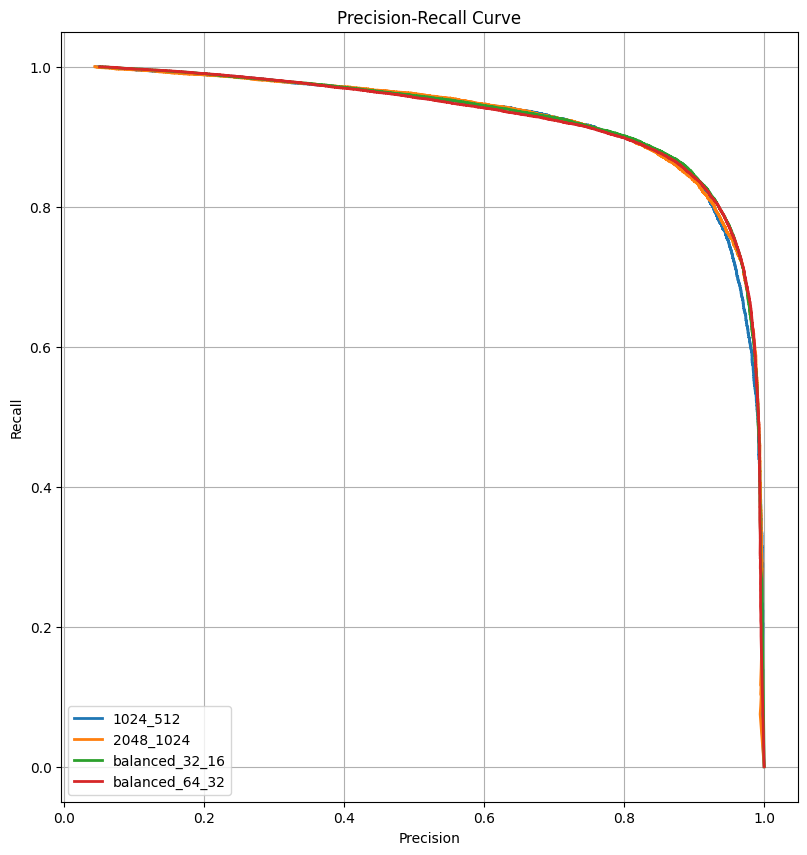


 1024_512
NEOs Found (True Positives): 94.58%
NEOs Missed (False Positives): 5.42%
Non-NEOs Identified (True Negatives): 97.11%
Non-NEOs Incorrectly Identified (False Negatives): 2.89%

 2048_1024
NEOs Found (True Positives): 94.11%
NEOs Missed (False Positives): 5.89%
Non-NEOs Identified (True Negatives): 97.54%
Non-NEOs Incorrectly Identified (False Negatives): 2.46%

 balanced_32_16
NEOs Found (True Positives): 94.60%
NEOs Missed (False Positives): 5.40%
Non-NEOs Identified (True Negatives): 96.51%
Non-NEOs Incorrectly Identified (False Negatives): 3.49%

 balanced_64_32
NEOs Found (True Positives): 94.43%
NEOs Missed (False Positives): 5.57%
Non-NEOs Identified (True Negatives): 96.33%
Non-NEOs Incorrectly Identified (False Negatives): 3.67%


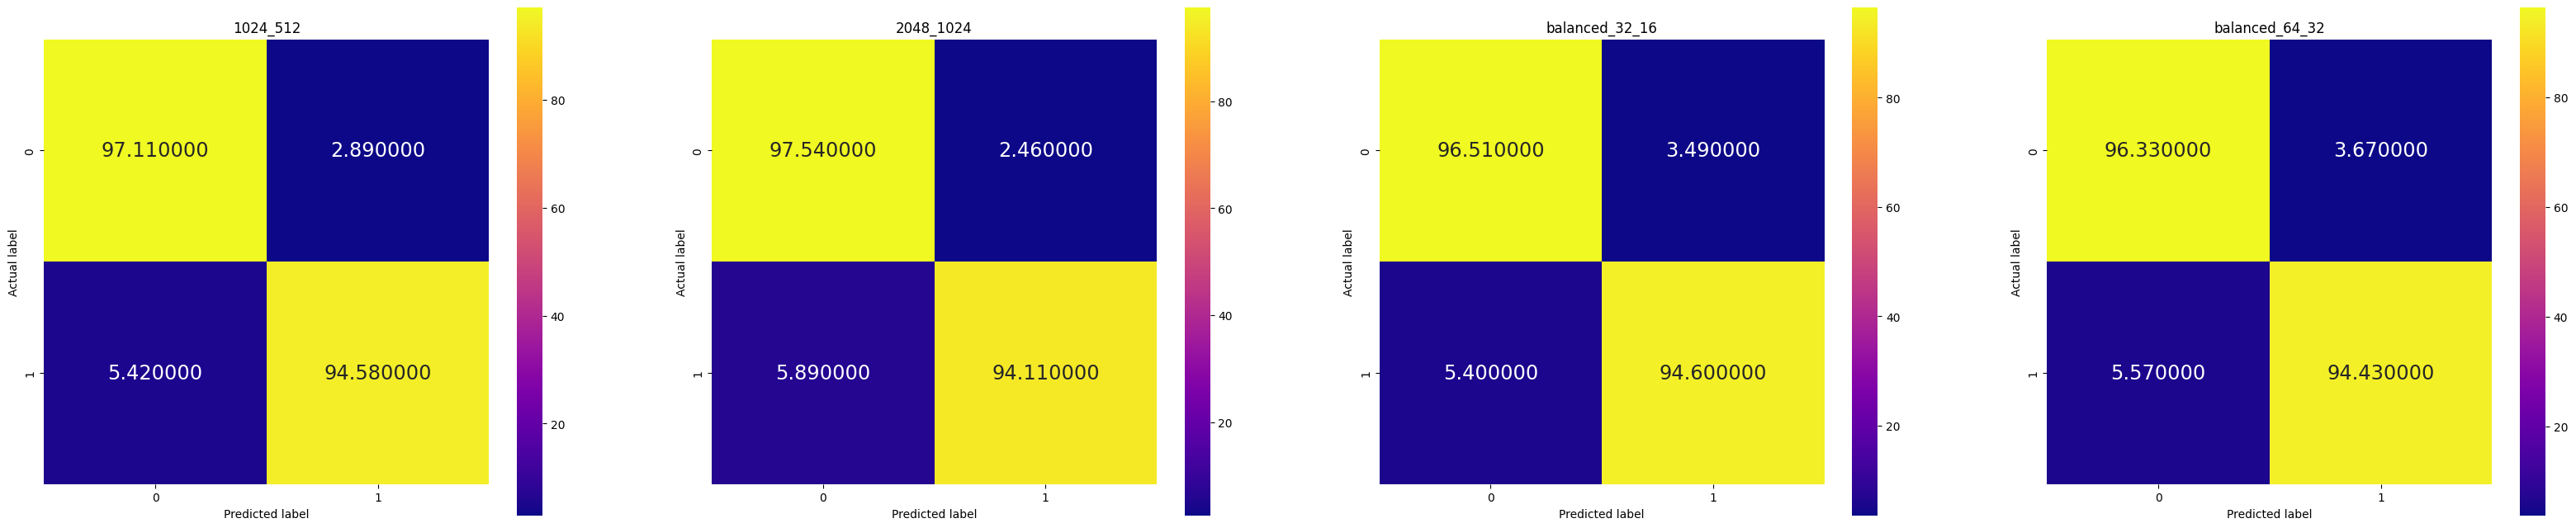

In [14]:
filename = ['1024_512', '2048_1024', 'balanced_32_16', 'balanced_64_32']

rcParams['figure.figsize'] = (10, 10)

for n, str in enumerate(filename):
    file = filename[n]
    results_path = os.path.join(directory.data_dir, 'results_' + file + '.npy')
    results = np.load(results_path, allow_pickle=True).tolist()
    results.items()

    plt.title('Precision-Recall Curve')
    plots.plot_prc(str, results['test_labels'], results['test_predictions_logits'], color=colors[n], linestyle='-')
    plt.legend(loc='lower left')

plt.show()
rcParams['figure.figsize'] = (40, 8)

for n, str in enumerate(filename):
    file = filename[n]
    results_path = os.path.join(directory.data_dir, 'results_' + file + '.npy')
    results = np.load(results_path, allow_pickle=True).tolist()
    results.items()
    
    print(f'\n', str)
    
    plt.subplot(1,len(filename),n+1)
    plots.plot_cm(results['test_labels'], results['test_predictions_bool'], 'plasma')
    plt.title(str)
